In [34]:
import pandas as pd
import re
data = pd.read_csv('pesquisausuarios.csv')

df_oportunidade = pd.DataFrame()

for column in data.columns:
    if "Satisfacao" in column:
        m = re.search('Satisfacao (.*)', column)
        new_col = m.group(1)
        df_oportunidade["Oportunidade " + new_col] = data.apply(lambda row: row["Importancia " + new_col] + max(int(row["Importancia " + new_col] - row["Satisfacao " + new_col]),0), axis=1)

df_oportunidade

,Oportunidade 1,Oportunidade 2,Oportunidade 3,Oportunidade 4,Oportunidade 5,Oportunidade 6,Oportunidade 7,Oportunidade 8,Oportunidade 9,Oportunidade 10,...,Oportunidade 12,Oportunidade 13,Oportunidade 14,Oportunidade 15,Oportunidade 16,Oportunidade 17,Oportunidade 18,Oportunidade 19,Oportunidade 20,Oportunidade 21
0,16,2,13,15,5,13,11,2,3,10,...,1,12,1,10,2,1,11,8,12,7
1,18,6,3,8,1,5,2,6,16,5,...,10,7,3,3,1,9,11,10,6,7
2,16,2,13,4,4,5,5,12,3,15,...,7,1,4,1,13,17,9,2,13,4
3,16,1,10,11,5,13,13,5,10,13,...,1,3,2,1,3,9,5,2,8,14
4,19,18,9,1,3,4,5,5,12,15,...,8,19,5,2,3,19,5,2,4,3
5,16,9,6,1,11,15,12,1,8,15,...,1,7,4,2,8,13,1,8,8,1
6,15,10,2,7,1,2,6,9,5,11,...,10,7,14,6,14,1,11,5,12,8
7,17,6,13,5,13,9,9,1,4,4,...,13,5,3,13,1,6,10,7,5,2
8,12,2,11,17,8,3,3,14,1,8,...,8,4,14,3,6,4,3,13,5,5
9,11,12,6,3,3,1,10,6,16,7,...,7,5,2,1,5,4,14,5,17,5


# Descobre os clusters

In [2]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=2)
data['Cluster'] = cluster.fit_predict(data.iloc[:,2:])

data

,ID,Importancia 1,Satisfacao 1,Importancia 2,Satisfacao 2,Importancia 3,Satisfacao 3,Importancia 4,Satisfacao 4,Importancia 5,...,Satisfacao 17,Importancia 18,Satisfacao 18,Importancia 19,Satisfacao 19,Importancia 20,Satisfacao 20,Importancia 21,Satisfacao 21,Cluster
0,1,10,4,2,8,10,7,10,5,5,...,8,10,9,6,4,10,8,7,9,1
1,3,10,2,6,7,3,10,7,6,1,...,3,10,9,7,4,6,9,7,9,0
2,4,10,4,2,7,8,3,4,9,4,...,1,9,10,2,2,10,7,4,9,1
3,5,9,2,1,8,6,2,6,1,4,...,7,5,9,2,4,6,4,8,2,1
4,6,10,1,10,2,9,10,1,10,2,...,1,5,10,2,8,4,7,3,4,0
5,7,10,4,6,3,6,6,1,9,8,...,5,1,2,5,2,6,4,1,5,1
6,8,8,1,8,6,2,9,5,3,1,...,5,8,5,3,1,10,8,5,2,1
7,9,10,3,4,2,9,5,5,8,8,...,9,9,8,4,1,5,10,2,7,1
8,10,8,4,2,4,6,1,9,1,7,...,8,3,6,10,7,5,6,4,3,1
9,11,7,3,8,4,6,10,3,9,3,...,4,8,2,5,8,10,3,5,9,0


# Agrupa por Cluster

In [3]:
df = data.iloc[:,1:].groupby(['Cluster'], as_index = False).mean()
df

,Cluster,Importancia 1,Satisfacao 1,Importancia 2,Satisfacao 2,Importancia 3,Satisfacao 3,Importancia 4,Satisfacao 4,Importancia 5,...,Importancia 17,Satisfacao 17,Importancia 18,Satisfacao 18,Importancia 19,Satisfacao 19,Importancia 20,Satisfacao 20,Importancia 21,Satisfacao 21
0,0,8.200000,2.133333,7.066667,5.066667,6.10000,6.566667,4.600000,5.800000,5.633333,...,5.300000,4.10000,4.800000,6.466667,6.600000,6.166667,5.233333,5.833333,6.300000,5.433333
1,1,8.515625,2.640625,4.781250,5.359375,6.09375,4.500000,4.890625,5.890625,6.312500,...,5.859375,5.96875,5.828125,4.859375,5.234375,5.140625,5.093750,5.718750,5.078125,5.078125


# Agrupa outcomes e cluster

In [4]:
# Transforma colunas de Outcome em linhas, agrupando por Outcome e Cluster
outcomes = pd.melt(df, id_vars=[('Cluster')])
outcomes

Importancia = outcomes[outcomes.variable.str.contains("Importancia.*")]
Satisfacao = outcomes[outcomes.variable.str.contains("Satisfacao.*")]


# Descobre Outcomes atrativos

In [5]:
new = {'Outcome': Importancia['variable']}
df_segmento = pd.DataFrame(data=new)
df_segmento['Cluster'] = Importancia['Cluster']
df_segmento['Satisfacao'] = Satisfacao['value'].values #ler https://stackoverflow.com/a/26221919
df_segmento['Importancia'] = Importancia['value']
df_segmento.tail()

,Outcome,Cluster,Satisfacao,Importancia
73,Importancia 19,1,5.140625,5.234375
76,Importancia 20,0,5.833333,5.233333
77,Importancia 20,1,5.718750,5.093750
80,Importancia 21,0,5.433333,6.300000
81,Importancia 21,1,5.078125,5.078125


# Calcular oportunidade e segmento de oportunidade

In [30]:
def calcular_oportunidade_segmento(row):
    row['Oportunidade'] = row['Importancia'] + (row['Importancia'] - row['Satisfacao'])
    if row['Oportunidade'] > 15.0:
        row['Segmento_oportunidade'] =  'Muito atrativo'
    elif row['Oportunidade'] > 10.0 and row['Oportunidade'] < 15.0:
        row['Segmento_oportunidade'] = 'Atrativo'
    else:
        row['Segmento_oportunidade'] = 'Não atrativo'
    return row

df_segmento = df_segmento.apply(calcular_oportunidade_segmento, axis=1)
df_segmento.tail()



,Outcome,Cluster,Satisfacao,Importancia,Oportunidade,Segmento_oportunidade
73,Importancia 19,1,5.140625,5.234375,5.328125,Não atrativo
76,Importancia 20,0,5.833333,5.233333,4.633333,Não atrativo
77,Importancia 20,1,5.718750,5.093750,4.468750,Não atrativo
80,Importancia 21,0,5.433333,6.300000,7.166667,Não atrativo
81,Importancia 21,1,5.078125,5.078125,5.078125,Não atrativo


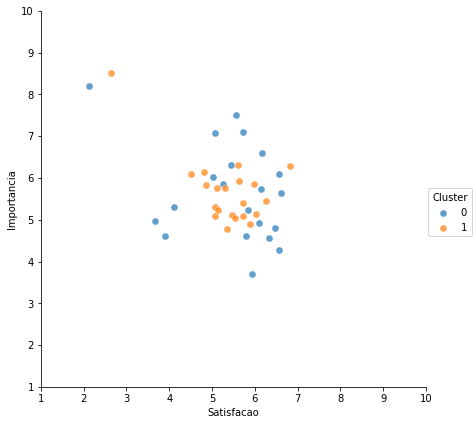

In [31]:
from ggplot import *
import matplotlib.pyplot as plt 
import seaborn as sns

ggplot(df_segmento, aes(x='Satisfacao', y='Importancia', color='Cluster')) + \
    geom_point(size=75) + \
    ggtitle("Customers Grouped by Cluster") + \
    xlim(1, 10) + \
    ylim(1, 10)

g = sns.FacetGrid(df_segmento, hue="Cluster", size=6)
g.map(plt.scatter, "Satisfacao", "Importancia", s=50, alpha=.7, linewidth=.5, edgecolor="white")
g.set(xlim=(1, 10), ylim=(1, 10));
g.add_legend();


In [46]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer()

fa.analyze(df_oportunidade.iloc[:,1:-2], 2, rotation='varimax', method='MINRES')
new_df = fa.loadings

#new_df.loc[new_df['Factor1'] < 0.1, 'Factor1'] = np.nan
#new_df.loc[new_df['Factor2'] < 0.1, 'Factor2'] = np.nan
#new_df.loc[new_df['Factor3'] < 0.1, 'Factor3'] = np.nan
#new_df.loc[new_df['Factor3'] < 0.1, 'Factor4'] = np.nan

new_df[(new_df.Factor1 > 0.1) | (new_df.Factor2 > 0.1)]

# Keep in mind that each of the identified factors should have at least three variables 
# with high factor loadings, and that each variable should load highly on only one factor.

fa.get_factor_variance()

,Factor1,Factor2
SS Loadings,1.265932,0.899810
Proportion Var,0.070330,0.049989
Cumulative Var,0.070330,0.120319
